In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

QUESTIONS:
How do we read in the data set and only skip certain rows?

COLUMN TO-DO:  
jobid - can stay as object. Range from 8 characters (no array) to 13 characters (4 digit array numbers) 
QUESTION - Are observations with longer lengths more likely to fail?
account, user - didn't investigate. Might come in handy if we see certain accounts/users have repeated problems.  
reqmem - HELP - split at M, so we can convert memory to integer, and separate by requests per core and per node. 
TO-DO - Group column by Mn and Mc, convert Mn values to the Mc values
usedmem - remove M, convert to float. Vast majority are below 1,000  
reqtime, usedtime - convert to datetime format.   
nodes, cpus - remain as integers, should be easy to use  
partition - keep as ojbect, should be easy to use  
exitcode - vast majority will be 0:0, but we need to find problems. Split into 2 columns??  
TO-DO - separate into columns, identify rows with failures
state - keep as ojbect, should be easy to use  
TO-DO - any correlation to exit codes?
nodelist - didn't get to

GROUP SESSION:
Intro: Weekly schedule - working between Thursday/Saturday? when is good time to meet?
Review work
Any major foreseeable problems?
Determine first phase of work, split values

In [189]:
accre = pd.read_csv('../data/accre-jobs-2020.csv', nrows = 500000, error_bad_lines=False)
accre

b'Skipping line 3461: expected 13 fields, saw 15\nSkipping line 3462: expected 13 fields, saw 16\nSkipping line 3465: expected 13 fields, saw 15\nSkipping line 3468: expected 13 fields, saw 16\nSkipping line 3472: expected 13 fields, saw 15\nSkipping line 3476: expected 13 fields, saw 16\nSkipping line 3479: expected 13 fields, saw 14\nSkipping line 3482: expected 13 fields, saw 14\nSkipping line 3486: expected 13 fields, saw 14\nSkipping line 3490: expected 13 fields, saw 14\nSkipping line 3494: expected 13 fields, saw 14\nSkipping line 3495: expected 13 fields, saw 16\nSkipping line 3497: expected 13 fields, saw 14\nSkipping line 3498: expected 13 fields, saw 14\nSkipping line 3499: expected 13 fields, saw 14\nSkipping line 3505: expected 13 fields, saw 14\nSkipping line 3517: expected 13 fields, saw 16\nSkipping line 3526: expected 13 fields, saw 15\nSkipping line 3528: expected 13 fields, saw 15\nSkipping line 3529: expected 13 fields, saw 15\nSkipping line 3530: expected 13 fields

b'Skipping line 396605: expected 13 fields, saw 14\nSkipping line 397416: expected 13 fields, saw 14\nSkipping line 398947: expected 13 fields, saw 14\nSkipping line 402958: expected 13 fields, saw 14\nSkipping line 410134: expected 13 fields, saw 14\nSkipping line 410135: expected 13 fields, saw 14\nSkipping line 410136: expected 13 fields, saw 14\nSkipping line 410137: expected 13 fields, saw 14\nSkipping line 410140: expected 13 fields, saw 14\nSkipping line 410165: expected 13 fields, saw 14\nSkipping line 410166: expected 13 fields, saw 14\nSkipping line 410168: expected 13 fields, saw 14\nSkipping line 410169: expected 13 fields, saw 14\nSkipping line 410170: expected 13 fields, saw 14\nSkipping line 410171: expected 13 fields, saw 14\nSkipping line 410172: expected 13 fields, saw 14\nSkipping line 410173: expected 13 fields, saw 14\nSkipping line 410174: expected 13 fields, saw 14\nSkipping line 410175: expected 13 fields, saw 16\nSkipping line 410176: expected 13 fields, saw 16

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,17782300,cms,cmslocal,28000Mn,6718.49M,2-00:00:00,07:16:38,1,4,production,0:0,COMPLETED,cn376
499996,17782301,cms,cmslocal,28000Mn,6645.88M,2-00:00:00,07:16:35,1,4,production,0:0,COMPLETED,cn451
499997,17782302,cms,cmslocal,28000Mn,6647.18M,2-00:00:00,07:16:35,1,4,production,0:0,COMPLETED,cn452
499998,17782303,bulk,dewitt,8000Mn,0,01:00:00,00:00:22,1,1,production,0:0,COMPLETED,cn382


In [190]:
accre.iloc[3450:3470]

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
3450,17050901_81,winged,lavonda,4096Mn,520.74M,12:00:00,04:03:49,1,4,production,0:0,COMPLETED,cn1391
3451,17050901_82,winged,lavonda,4096Mn,357.84M,12:00:00,00:02:06,1,4,production,0:0,COMPLETED,cn1308
3452,17050901_83,winged,lavonda,4096Mn,417.43M,12:00:00,00:02:43,1,4,production,0:0,COMPLETED,cn416
3453,17050901_84,winged,lavonda,4096Mn,503.70M,12:00:00,00:02:30,1,4,production,0:0,COMPLETED,cn416
3454,17050901_85,winged,lavonda,4096Mn,636.89M,12:00:00,00:02:27,1,4,production,0:0,COMPLETED,cn416
3455,17050901_86,winged,lavonda,4096Mn,441.42M,12:00:00,00:02:27,1,4,production,0:0,COMPLETED,cn416
3456,17050901_87,winged,lavonda,4096Mn,415.38M,12:00:00,00:02:26,1,4,production,0:0,COMPLETED,cn416
3457,17050901_88,winged,lavonda,4096Mn,457.05M,12:00:00,00:02:26,1,4,production,0:0,COMPLETED,cn416
3458,17050901_89,winged,lavonda,4096Mn,520.64M,12:00:00,08:25:01,1,4,production,0:0,COMPLETED,cn421
3459,17050901_92,winged,lavonda,4096Mn,500.06M,12:00:00,00:02:25,1,4,production,0:0,COMPLETED,cn1336


In [191]:
#accre.iloc[13]

In [192]:
#accre.info()

In [193]:
#Work on REQMEM column - WHAT AM I DOING WRONG HERE???

In [194]:
#accre.sort_values('REQMEM', ascending=True, inplace=True)
accre

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,17782300,cms,cmslocal,28000Mn,6718.49M,2-00:00:00,07:16:38,1,4,production,0:0,COMPLETED,cn376
499996,17782301,cms,cmslocal,28000Mn,6645.88M,2-00:00:00,07:16:35,1,4,production,0:0,COMPLETED,cn451
499997,17782302,cms,cmslocal,28000Mn,6647.18M,2-00:00:00,07:16:35,1,4,production,0:0,COMPLETED,cn452
499998,17782303,bulk,dewitt,8000Mn,0,01:00:00,00:00:22,1,1,production,0:0,COMPLETED,cn382


In [195]:
accre.columns

Index(['JOBID', 'ACCOUNT', 'USER', 'REQMEM', 'USEDMEM', 'REQTIME', 'USEDTIME',
       'NODES', 'CPUS', 'PARTITION', 'EXITCODE', 'STATE', 'NODELIST'],
      dtype='object')

In [196]:
#accre['memory', 'core_node'] = accre.REQMEM.str.split('M', expand=True)
#accre

In [197]:
#Work on USEDMEM column

In [198]:
accre['USEDMEM'].isna().sum()

0

In [199]:
#accre['USEDMEM'] = accre['USEDMEM'].str.replace('M', '').str.strip()
#accre['USEDMEM'] = accre['USEDMEM'].astype(float)
#accre.sort_values('USEDMEM', ascending=True, inplace=True)
#accre

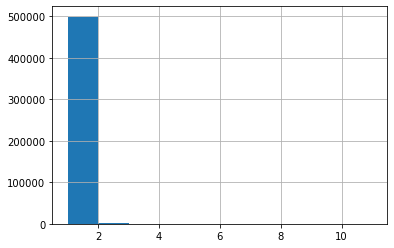

In [200]:
accre['NODES'].hist();

In [167]:
accre[accre['USEDMEM'] < 10000]['USEDMEM'].hist(bins=50);

TypeError: '<' not supported between instances of 'str' and 'int'

In [168]:
#Work on NODES, CPUS, PARTITION, EXITCODE, STATE

In [101]:
accre['NODES'].value_counts()

1    3453
2       5
4       1
Name: NODES, dtype: int64

In [103]:
accre['CPUS'].value_counts().sort_index()

1     3229
2       49
3        1
4       99
5        4
6        1
7        1
8       14
11       1
12      15
16      20
24      25
Name: CPUS, dtype: int64

In [104]:
accre['PARTITION'].value_counts().sort_index()

cgw-capra1           2
cgw-cqs1             2
cgw-dougherty1       1
cgw-tbi01            1
maxwell              2
nogpfs              23
pascal               6
production        3421
turing               1
Name: PARTITION, dtype: int64

In [106]:
accre['EXITCODE'].value_counts().sort_index()

0:0    3458
0:6       1
Name: EXITCODE, dtype: int64

In [107]:
accre['STATE'].value_counts().sort_index()

CANCELLED       1
COMPLETED    3458
Name: STATE, dtype: int64